In [13]:
import seaborn as sb
import pandas as pd


In [2]:
planetas = sb.load_dataset('planets')

In [3]:
planetas.shape

(1035, 6)

In [5]:
planetas.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [8]:
planetas.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [11]:
planetas.distance.sum()

213367.98000000004

La desviación media absoluta
$$\frac{\sum_{i=1}^n |x_i - \bar{x}|}{n}$$

In [14]:
planetas.distance.mad()

318.100885452407

In [16]:
planetas.distance.std()

733.1164929404422

In [17]:
planetas.distance.var()

537459.7922212934

Analisis por grupos

In [18]:
planetas.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

##  Para cada uno de los métodos empleados, vamos a sacar el método y el tamaño empleado mediante un bucle:

In [21]:
for (method, group)in planetas.groupby('method'):
    print('{0:30s} shape={1}'.format(method, group.shape)) #Reservamos un espacio de 30 caracteres donde irá el nombre del método y despues imprimimos el tamaño empleado para ese método

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


### Puedo agrupar y ver para cada método como se comporta una variable en concreto

In [22]:
planetas.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [23]:
decade = 10*(planetas['year']//10)

In [24]:
decade = decade.astype(str)+'s'

In [25]:
decade.name = 'decade'

In [26]:
planetas.groupby(['method', decade])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [28]:
#Es lo mismo que antes pero en un formato no apilado que nos muestra conteos
planetas.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Diagrama de cajas y Bigotes

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
np.random.seed(19880519)

In [31]:
dist1 = 100*np.random.rand(50) #50 número aleatorios entre 0 y 100.
dist2 = 50*np.ones(25) #Distribución muy centralizada. 25 números con valor 50
dist3 = 100+100*np.random.rand(10) #para que tenga outliers por arriba 
dist4 = -100*np.random.rand(10) #para que tenga outliers por arriba
datos = np.concatenate((dist1, dist2, dist3, dist4))

{'whiskers': [<matplotlib.lines.Line2D at 0x1da141a94a8>,
 'caps': [<matplotlib.lines.Line2D at 0x1da141a9d68>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da141a9358>],
 'medians': [<matplotlib.lines.Line2D at 0x1da141bb5f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da141bba20>],
 'means': []}

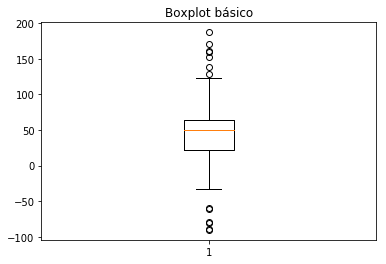

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot básico')
ax1.boxplot(datos)

{'whiskers': [<matplotlib.lines.Line2D at 0x1da14229f28>,
 'caps': [<matplotlib.lines.Line2D at 0x1da14233828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da14229dd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1da1423d0b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da1423d4e0>],
 'means': []}

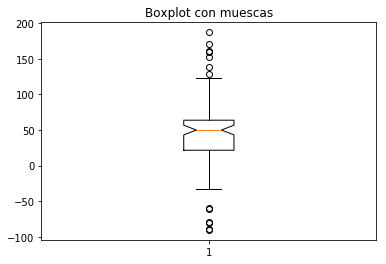

In [35]:
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot con muescas')
ax2.boxplot(datos, notch = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1da14292a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1da14299390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da14292940>],
 'medians': [<matplotlib.lines.Line2D at 0x1da14299be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da142a2048>],
 'means': []}

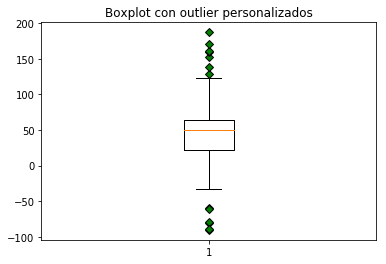

In [36]:
green_diamond = dict(markerfacecolor = 'g', marker = 'D')
fig3, ax3 = plt.subplots()
ax3.set_title('Boxplot con outlier personalizados')
ax3.boxplot(datos, flierprops = green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x1da14345668>,
 'caps': [<matplotlib.lines.Line2D at 0x1da14345f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da14345518>],
 'medians': [<matplotlib.lines.Line2D at 0x1da1434d7b8>],
 'fliers': [],
 'means': []}

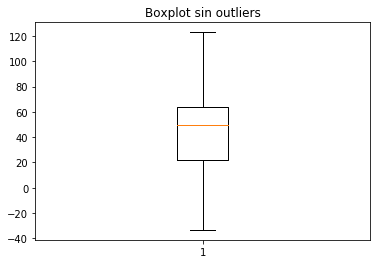

In [38]:
fig4, ax4 = plt.subplots()
ax4.set_title('Boxplot sin outliers')
ax4.boxplot(datos, showfliers = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1da14664940>,
 'caps': [<matplotlib.lines.Line2D at 0x1da1466e240>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da146647f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da1466ea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da1466eeb8>],
 'means': []}

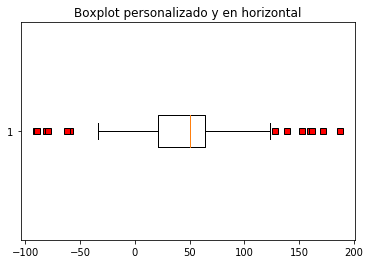

In [43]:
red_square = dict(markerfacecolor = 'r', marker = 's')
fig5, ax5 = plt.subplots()
ax5.set_title('Boxplot personalizado y en horizontal')
ax5.boxplot(datos, flierprops = red_square, vert= False, whis=1.5)

In [45]:
dist1 = 100*np.random.rand(50) #50 número aleatorios entre 0 y 100.
dist2 = 40*np.ones(25) #Distribución muy centralizada. 25 números con valor 50
dist3 = 100+100*np.random.rand(10) #para que tenga outliers por arriba 
dist4 = -100*np.random.rand(10) #para que tenga outliers por arriba
data2 = np.concatenate((dist1,dist2,dist3,dist4))

In [50]:
datos.shape = (-1,1)
data2.shape = (-1,1)

In [53]:
full_data = [datos, data2, data2[::2,0]]

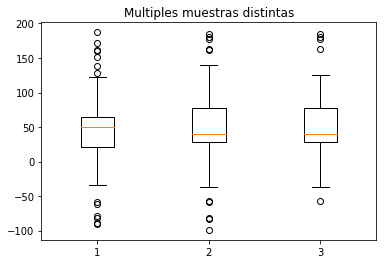

In [55]:
fig7, ax7 = plt.subplots()
ax7.set_title('Multiples muestras distintas')
ax7.boxplot(full_data)
plt.show()

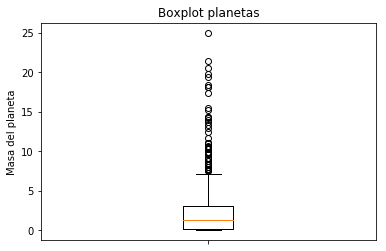

In [74]:
fig8, ax8 = plt.subplots()
ax8.set_title('Boxplot planetas')
ax8.boxplot(planetas['mass'].dropna())
ax8.set_xticklabels('')
plt.ylabel('Masa del planeta')
plt.show()

In [63]:
planetas.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
